<a href="https://colab.research.google.com/github/rashmi-biswas/global_terrorism_eda/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Global Terrorism/Global Terrorism Data.csv"
df = pd.read_csv(file_path,  encoding = "ISO-8859-1", engine='python')

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

The 2nd last row contains data of a attack/incident happened particularly in India. So, it will help us understand and relate the features in the dataset more clearly. Lets check

In [10]:
a = df.loc[181689]
pd.DataFrame(a).transpose()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.7983,93.9404,1,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0,NaN,NaN,0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0,0,0,0,0,0,-9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [11]:
df.shape

(181691, 135)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [13]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [15]:
df.describe(include = 'all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,181691,181270,181257,177135.000000,1.771340e+05,181685.000000,181691.000000,55495,115562,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,29011,181690.000000,181691.000000,181691.000000,181691.000000,181691,6314.000000,6314,428.000000,428,181691.000000,181691,171318.000000,171318,139141,181055,...,70.000000,70,114021,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,64065,3.898900e+04,57959,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,324,3305,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,514,10991.000000,10991,10400.000000,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,12,2855,36674,NaN,NaN,NaN,NaN,44109,112492,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,9,NaN,9,NaN,8,NaN,22,NaN,112,33238,86006,...,NaN,16,19148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,19157,NaN,NaN,NaN,NaN,NaN,143,217,NaN,NaN,NaN,NaN,NaN,387,NaN,7,NaN,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,NaN,NaN,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",NaN,NaN,NaN,NaN,NaN,Insurgency/Guerilla Action,NaN,NaN,NaN,NaN,Bombing/Explosion,NaN,Armed Assault,NaN,Facility/Infrastructure Attack,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Unknown,Civilians,...,NaN,Automatic or Semi-Automatic Rifle,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor (likely < $1 million),NaN,It is unknown if any property was damaged in t...,NaN,NaN,NaN,NaN,NaN,Unknown,Colombia,NaN,NaN,NaN,NaN,NaN,0,NaN,Unknown,NaN,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,50474,7645,9775,NaN,NaN,NaN,NaN,142,100,NaN,NaN,NaN,NaN,NaN,23410,NaN,NaN,NaN,NaN,88255,NaN,3434,NaN,229,NaN,43511,NaN,11596,16356,6461,...,NaN,16,20925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43304,NaN,6966,NaN,NaN,NaN,NaN,NaN,27,687,NaN,NaN,NaN,NaN,NaN,36,NaN,3606,NaN,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,NaN,NaN,NaN,23.498343,-4.586957e+02,1.451452,0.068297,NaN,NaN,0.988530,0.993093,0.875668,-0.523171,1.292923,NaN,0.137773,0.889598,0.036507,3.247547,NaN,3.719512,NaN,5.245327,NaN,8.439719,NaN,46.971474,NaN,NaN,NaN,...,10.842857,NaN,NaN,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,NaN,2.088119e+05,NaN,0.059054,4.533230,-0.353999,-46.793933,-32.516371,NaN,NaN,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,NaN,4.629242,NaN,-29.018269,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.2594

In [16]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [17]:
df.shape[0]

181691

In [18]:
len(df)

181691

Dropping columns with 60% of null Values.

In [19]:
# gt_df = df.dropna(thresh=len(df)*0.6,how='all',axis=1) or

gt_df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [20]:
gt_df.shape           # decreased data a lot

(181691, 58)

So, now we have reduced the data size a lot by removing ambiguous/incomplete data.

In [21]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [22]:
# Lets check percentage of null values in each column:
gt_df.isna().sum()/len(gt_df) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [23]:
# dropping duplicates that are row based
gt_df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,-99.0,0.0,0

In [24]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,110576.000000,112202.000000,115571.000000,181691.000000,160923.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,-65.361154,-1.517727,0.049666,6.447325,11.117162,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,216.536633,12.830346,1.093195,2.173435,6.495612,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,16.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,25000.000000,406.000000,1.000000,13.000000,31.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From dataset we can observe that there are some columns which contain some text data and the columns adjacent to these cols contain the numeric code for the text data.

Lets check columns containing only numeric values first

In [25]:
# Columns with numeric values only

numeric_cols = gt_df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_cols))
# print(numeric_cols)
numeric_cols

41


['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weapsubtype1',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

Lets fill the NA values in Numeric Columns by corresponding Median values.

In [26]:
# Filling na values by median:

for i in numeric_cols:
  if (i != 'nkill') and (i != 'nwound'):
    gt_df[i] = gt_df[i].fillna(gt_df[i].median)

In [27]:
gt_df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [28]:
gt_df['nwound'].describe()

count    165380.000000
mean          3.167668
std          35.949392
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: nwound, dtype: float64

In [29]:
gt_df.nkill.describe()

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: nkill, dtype: float64

Let's fill na values in col- nkill and nwound by corresponding median values and also create a new col of casualities

In [30]:
gt_df['nwound'] = gt_df['nwound'].fillna(0).astype(int)
gt_df['nkill'] = gt_df['nkill'].fillna(0).astype(int)
gt_df['casualities'] = gt_df['nkill'] + gt_df['nwound']

In [31]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   eventid           181691 non-null  int64 
 1   iyear             181691 non-null  int64 
 2   imonth            181691 non-null  int64 
 3   iday              181691 non-null  int64 
 4   extended          181691 non-null  int64 
 5   country           181691 non-null  int64 
 6   country_txt       181691 non-null  object
 7   region            181691 non-null  int64 
 8   region_txt        181691 non-null  object
 9   provstate         181270 non-null  object
 10  city              181257 non-null  object
 11  latitude          181691 non-null  object
 12  longitude         181691 non-null  object
 13  specificity       181691 non-null  object
 14  vicinity          181691 non-null  int64 
 15  summary           115562 non-null  object
 16  crit1             181691 non-null  int

In [32]:
gt_df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

Now we have replaced null values in numeric cols by the median value of that particular col

Now we are left with the text data ie Object or String type datatype.

In [33]:
# lets check columns with text or object type data only

text_cols = gt_df.select_dtypes(include= object).columns.tolist()
print(len(text_cols))
# print(numeric_cols)
text_cols

34


['country_txt',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'summary',
 'doubtterr',
 'multiple',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkillus',
 'nkillter',
 'nwoundus',
 'nwoundte',
 'ishostkid',
 'scite1',
 'dbsource']

Out of all the above text columns, only few are having null values in them. Lets check those text columns which contain null values

In [34]:
na_text_col = gt_df.columns[gt_df.isna().any().tolist()]
na_text_col

Index(['provstate', 'city', 'summary', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1_txt', 'weapsubtype1_txt', 'weapdetail', 'scite1'],
      dtype='object')

In [35]:
len(na_text_col)

10

Now, of these null value containing text columns, we will replace the null values in only few important/significant columns by the mode of that particular column.
Lets check the modes first

In [36]:
gt_df.describe(include = np.object)

,country_txt,region_txt,provstate,city,latitude,longitude,specificity,summary,doubtterr,multiple,attacktype1_txt,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkillus,nkillter,nwoundus,nwoundte,ishostkid,scite1,dbsource
count,181691,181691,181270,181257,181691.000000,181691.000000,181691.0,115562,181691.0,181691.0,181691,181691,181691.0,171318,139141,181055,181691.0,180132,181691,181691.0,181691.0,181691.0,181691.0,181691,181691.0,160923,114021,181691.0,181691.0,181691.0,181691.0,181691.0,115500,181691
unique,205,12,2855,36674,48323.000000,48040.000000,6.0,112492,4.0,3.0,9,22,113.0,112,33238,86006,216.0,215,3537,3.0,114.0,51.0,4.0,12,31.0,30,19148,32.0,97.0,45.0,45.0,4.0,83988,26
top,Iraq,Middle East & North Africa,Baghdad,Unknown,33.303566,44.371773,1.0,"09/00/2016: Sometime between September 18, 201...",0.0,0.0,Bombing/Explosion,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Unknown,Civilians,95.0,Iraq,Unknown,0.0,-99.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,Committee on Government Operations United Stat...,START Primary Collection
freq,24636,50474,7645,9775,7521.000000,7521.000000,144996.0,100,138905.0,156658.0,88255,43511,11596.0,11596,16356,6461,24113.0,24113,82782,166545.0,82218.0,106158.0,95091.0,92426,44980.0,44980,20925,116344.0,101532.0,116342.0,110085.0,167624.0,205,78002


In [37]:
# mode of each text col:
for i in na_text_col:
  x = gt_df[i].mode()
  print(i)
  print(x)
  print('\n')

provstate
0    Baghdad
dtype: object


city
0    Unknown
dtype: object


summary
0    09/00/2016: Sometime between September 18, 201...
dtype: object


targsubtype1_txt
0    Unnamed Civilian/Unspecified
dtype: object


corp1
0    Unknown
dtype: object


target1
0    Civilians
dtype: object


natlty1_txt
0    Iraq
dtype: object


weapsubtype1_txt
0    Unknown Explosive Type
dtype: object


weapdetail
0    Explosive
dtype: object


scite1
0    Committee on Government Operations United Stat...
dtype: object




In [38]:
# Replacing null vales in column 'provstate','city','target1' by respective modes

for i in ['provstate','city','target1']:          
  gt_df[i] = gt_df[i].fillna(gt_df[i].mode())

We are almost done with the data cleaning:

In [39]:
gt_df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'casualities']

Let's filter the data as per requirment of analysis:

In [40]:
# Let's take only Significant Columns for analysis:

terror_df = gt_df[['iday','imonth','iyear','extended','country_txt','region_txt','provstate','city','latitude','longitude','success',
 'suicide','targtype1_txt','gname','weaptype1_txt','attacktype1_txt','nkill','nwound','casualities'] ]

In [41]:
terror_df.head()

,iday,imonth,iyear,extended,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,targtype1_txt,gname,weaptype1_txt,attacktype1_txt,nkill,nwound,casualities
0,2,7,1970,0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.4568,-69.9512,1,0,Private Citizens & Property,MANO-D,Unknown,Assassination,1,0,1
1,0,0,1970,0,Mexico,North America,Federal,Mexico city,19.3719,-99.0866,1,0,Government (Diplomatic),23rd of September Communist League,Unknown,Hostage Taking (Kidnapping),0,0,0
2,0,1,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.4786,120.6,1,0,Journalists & Media,Unknown,Unknown,Assassination,1,0,1
3,0,1,1970,0,Greece,Western Europe,Attica,Athens,37.9975,23.7627,1,0,Government (Diplomatic),Unknown,Explosives,Bombing/Explosion,0,0,0
4,0,1,1970,0,Japan,East Asia,Fukouka,Fukouka,33.5804,130.396,1,0,Government (Diplomatic),Unknown,Incendiary,Facility/Infrastructure Attack,0,0,0


In [42]:
# let's rename the columns in proper format

terror_df.rename(columns = {'iday':'day','imonth':'month','iyear':'year','country_txt':'country','region_txt':'region','targtype1_txt':'target_type','gname':'group_name','weaptype1_txt':'weaptype','attacktype1_txt':'attacktype','nkill':'killed','nwound':'wounded'},inplace=True)
terror_df.head()

,day,month,year,extended,country,region,provstate,city,latitude,longitude,success,suicide,target_type,group_name,weaptype,attacktype,killed,wounded,casualities
0,2,7,1970,0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.4568,-69.9512,1,0,Private Citizens & Property,MANO-D,Unknown,Assassination,1,0,1
1,0,0,1970,0,Mexico,North America,Federal,Mexico city,19.3719,-99.0866,1,0,Government (Diplomatic),23rd of September Communist League,Unknown,Hostage Taking (Kidnapping),0,0,0
2,0,1,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.4786,120.6,1,0,Journalists & Media,Unknown,Unknown,Assassination,1,0,1
3,0,1,1970,0,Greece,Western Europe,Attica,Athens,37.9975,23.7627,1,0,Government (Diplomatic),Unknown,Explosives,Bombing/Explosion,0,0,0
4,0,1,1970,0,Japan,East Asia,Fukouka,Fukouka,33.5804,130.396,1,0,Government (Diplomatic),Unknown,Incendiary,Facility/Infrastructure Attack,0,0,0


In [43]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   day          181691 non-null  int64 
 1   month        181691 non-null  int64 
 2   year         181691 non-null  int64 
 3   extended     181691 non-null  int64 
 4   country      181691 non-null  object
 5   region       181691 non-null  object
 6   provstate    181271 non-null  object
 7   city         181257 non-null  object
 8   latitude     181691 non-null  object
 9   longitude    181691 non-null  object
 10  success      181691 non-null  int64 
 11  suicide      181691 non-null  int64 
 12  target_type  181691 non-null  object
 13  group_name   181691 non-null  object
 14  weaptype     181691 non-null  object
 15  attacktype   181691 non-null  object
 16  killed       181691 non-null  int64 
 17  wounded      181691 non-null  int64 
 18  casualities  181691 non-null  int64 
dtypes:

In [44]:
terror_df.killed.describe()

count    181691.000000
mean          2.266860
std          11.227057
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: killed, dtype: float64

Let's check the unique values and there counts in some columns:

In [45]:
print(terror_df['region'].unique())
print(terror_df['region'].value_counts())
print(len(terror_df['region'].unique()))

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64
12


In [46]:
print(terror_df['country'].unique())
print(terror_df['country'].value_counts())
print(len(terror_df['country'].unique()))

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

In [47]:
print(terror_df['target_type'].unique())
print(terror_df['target_type'].value_counts())
print(len(terror_df['target_type'].unique()))

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft      

In [48]:
print(terror_df['group_name'].unique())
print(terror_df['group_name'].value_counts())
print(len(terror_df['group_name'].unique()))

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Muslim United Liberation Tigers of Assam (MULTA)        1
Commander Gonzalo Southern Group                        1
Worldwide Organization of Native Taiwanese              1
Wild Cats                                               1
Armed Action Force (FADA)                               1
Name: group_name, Length: 3537, dtype: int64
3537


In [49]:
print(terror_df['weaptype'].unique())
print(terror_df['weaptype'].value_counts())
print(len(terror_df['weaptype'].unique()))

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological    

Let's start some analysis through visualization

1) Year Wise Analysis

Let's check year-wise no. of attacks

In [50]:
year_attack=terror_df['year'].value_counts().to_frame()
year_attack[0:10]

,year
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826
2008,4805


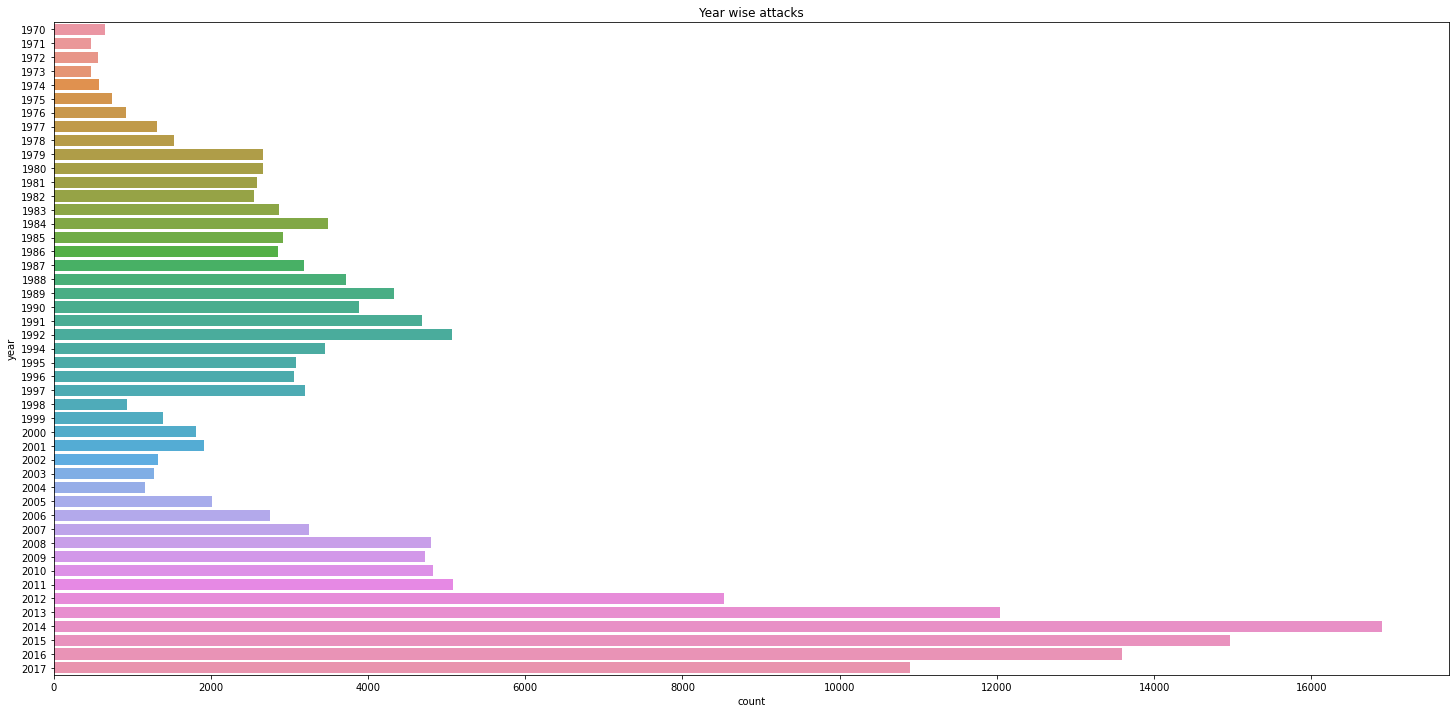

In [51]:
# check no. of attacks in every year

plt.figure(figsize=(25, 12))
plt.title('Year wise attacks')
plt.xlabel('Count')
plt.ylabel('Year')
sns.countplot(y='year',data=terror_df)

Insight
Top 10 most attacked years
(Year -- No. of Attacks)

2014 - 16903
2015 - 14965
2016 - 13587
2013 - 12036
2017 - 10900
2012 - 8522
2011 - 5076
1992 - 5071
2010 - 4826
2008 - 4805
So, we can observe that

Most attacks in the year of 2014.
Least attacks in the year of 1971.
There is significant rise/increase in no. of terrorist attacks just in one decade ie in last decade of 2010-20.

Let's take look at no. of people got wounded and no. of people lost their lives in terrorist attacks every year

Text(0, 0.5, 'Number of People')

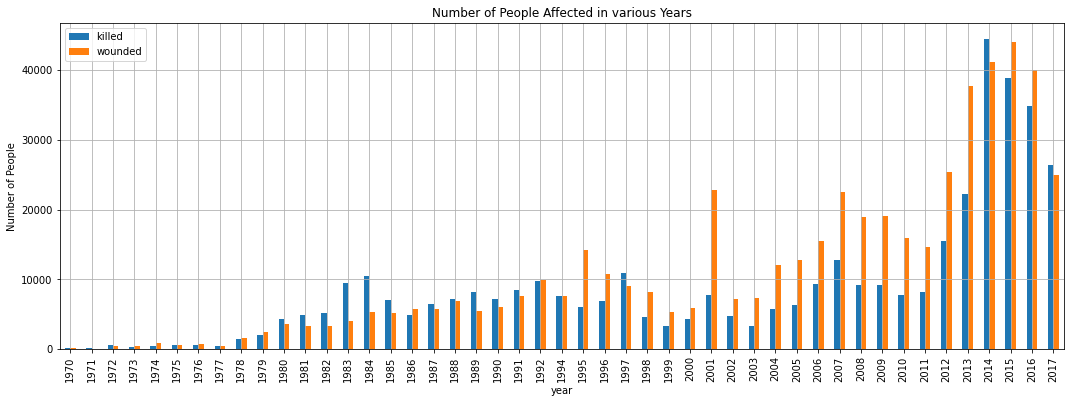

In [52]:
year_killed_wounded = terror_df[['year','killed','wounded']]
year_killed_wounded = year_killed_wounded.groupby('year')[['killed','wounded']].sum()
# year_killed_wounded = year_killed_wounded.tail(18)
year_killed_wounded.reset_index(inplace=True)

year_killed_wounded.plot(x='year',y=['killed','wounded'],kind='bar',figsize=(18,6))
plt.title('Number of People Affected in various Years')
plt.grid()
plt.ylabel('Number of People')

Insight
From graph we can observe that

many people have lost their lives in the terrorist attacks in period between 2012 & 2017 and the no. of killed people is highest particularly for year 2014.
many people got injured in the terrorist attacks in period between 2012 & 2017 and the no. of people who got injured is highest particularly for year 2015.

Lets observe the trend of casualities in all these years

In [53]:
bub=year_killed_wounded.reset_index()
# bub.iplot(kind='bubble',x='Year',y='kill',size='Wound',title="Number of killed People on Y and Wounded People by Size")
fig=px.scatter(bub,x='year',y='killed',size='wounded',title="Number of killed People on Y-axis and size of bubble represents no. of Wounded People")
fig.show()

Insight
From this graph we can see that the no. of people killed and no. of people got injured both are increasing every year and both the numbers are noticably high for past few years.

This actually represents the intensity of terrorist attacks and its impact on lives of people. Intensity of terrorist attacks and resultant deaths and injuries are very high for period of last one decade i.e. 2010-20.

Let's check year-wise no. of deaths due to terrorist attacks and the resultant death trend

Text(0, 0.5, 'Total Kills')

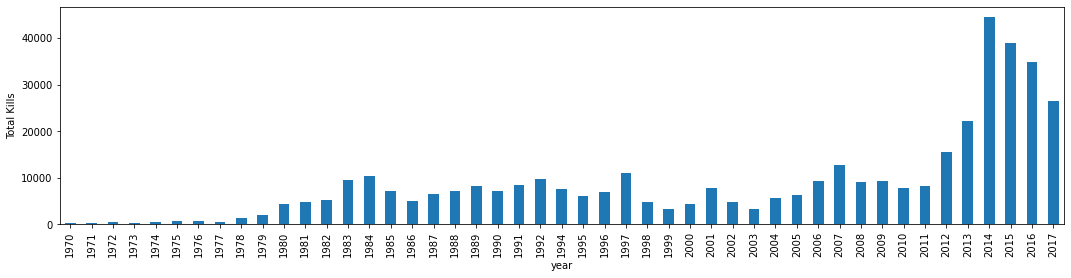

In [54]:
# no. of deaths:
kills=terror_df.groupby('year')['killed'].sum()
fig=plt.figure(figsize=(18,4))
kills.plot(kind='bar')
plt.ylabel('Total Kills')

Text(0, 0.5, 'Total deaths')

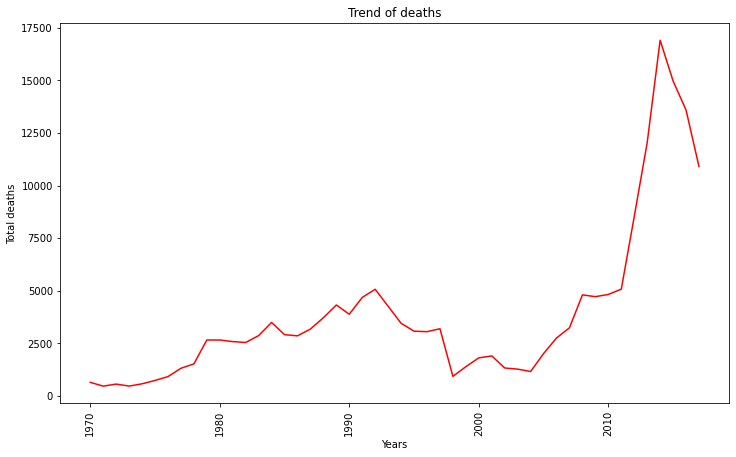

In [55]:
# death trend:
plt.subplots(figsize=(12,7))
terror_df.groupby(['year']).count()['killed'].plot(color = 'red')
plt.xticks(rotation=90)
plt.title("Trend of deaths")
plt.xlabel("Years")
plt.ylabel("Total deaths")

Insight
From above graphs we can observe that the there is abrupt rise in deaths in years after 2010.

Let's check favourite Months of Terrorists:

In [56]:
terror_df.month.value_counts()
months = list(terror_df.month.value_counts().index)
attacks_count = list(terror_df.month.value_counts().values)

In [57]:
print(months)
print(attacks_count)

[5, 7, 8, 10, 6, 3, 4, 1, 11, 9, 2, 12, 0]
[16875, 16268, 15800, 15563, 15359, 15257, 15152, 14936, 14906, 14180, 13879, 13496, 20]


We can see that there are 0's in the month column but the attack count corresponding to these zero label months is just 20. So, we can ignore these instances.

In [58]:
terror_df1 = terror_df[terror_df['month'] != 0]

We have got rid of those Zero valued months without any significant loss of data.

In [59]:
terror_df1.month.value_counts()
months = list(terror_df1.month.value_counts().index)
attacks_count = list(terror_df1.month.value_counts().values)

In [60]:
print(months)
print(attacks_count)

[5, 7, 8, 10, 6, 3, 4, 1, 11, 9, 2, 12]
[16875, 16268, 15800, 15563, 15359, 15257, 15152, 14936, 14906, 14180, 13879, 13496]


(10000.0, 20000.0)

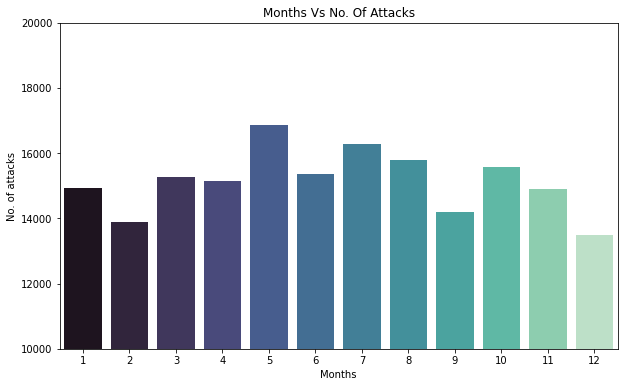

In [61]:
plt.figure(figsize=(10, 6))
plt.title('Months Vs No. Of Attacks')
plt.xlabel('Months')
plt.ylabel('No. of attacks')
sns.barplot(x = months, y = attacks_count, palette='mako').set_ylim(10000,20000)

Insight
Most number of Terrorist Attacks happened in month of
May &
July

2. Region Wise Analysis

Let's check the effect of terrorism on different regions of the World:

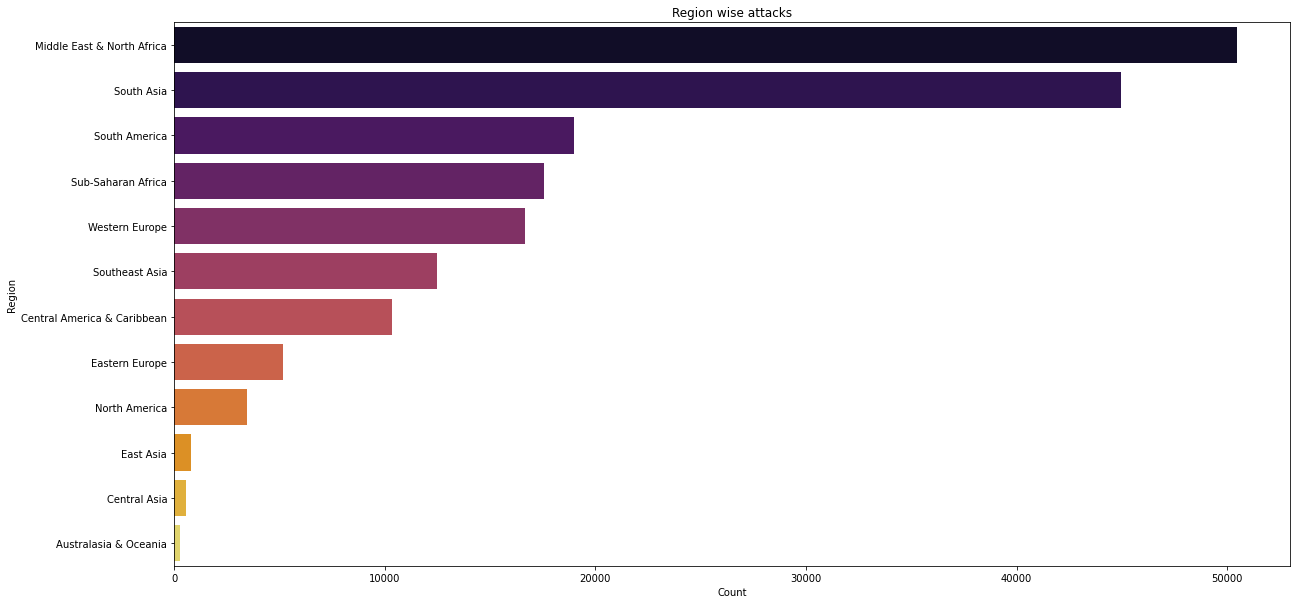

In [62]:
# let's check region wise attacks

plt.figure(figsize=(20, 10))
plt.title('Region wise attacks')
plt.xlabel('Count')
plt.ylabel('Region')
sns.barplot(y = terror_df.region.value_counts().index , x = terror_df.region.value_counts().values, palette='inferno')

plt.show()

Insight
Most Attacked Region ( Top 5 ):
Middle East & North Africa
South Asia
South America
Sub-Saharan Africa
Western Europe


Now lets check the year wise rise in the Terrorist Activities in different regions of the World

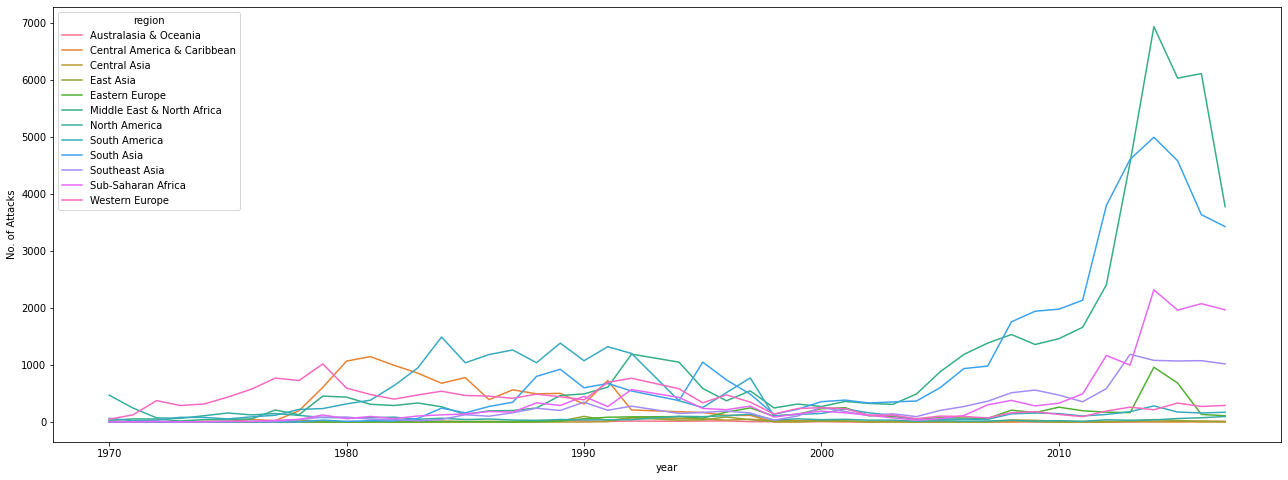

In [63]:
# No. of attacks
df_region = pd.crosstab(terror_df.year,terror_df.region)
df_region.plot(color=sns.color_palette('husl',12))
fig=plt.gcf()
fig.set_size_inches(22,8)
plt.ylabel('No. of Attacks')
plt.show()

Insight
From above we can observe that the no. of terrorist acitivities have risen up in recent years (mainly in Last 1 dacade ie. 2010-20) in the regions of the world which are considered as most attacked by terrorists

Region Vs Killed

In [64]:
region_killed = terror_df[['region','killed']].groupby(["region"],axis=0).sum().sort_values('killed', ascending = False)
region_killed

,killed
region,
Middle East & North Africa,137642
South Asia,101319
Sub-Saharan Africa,78386
South America,28849
Central America & Caribbean,28708
Southeast Asia,15637
Eastern Europe,7415
Western Europe,6694
North America,4916


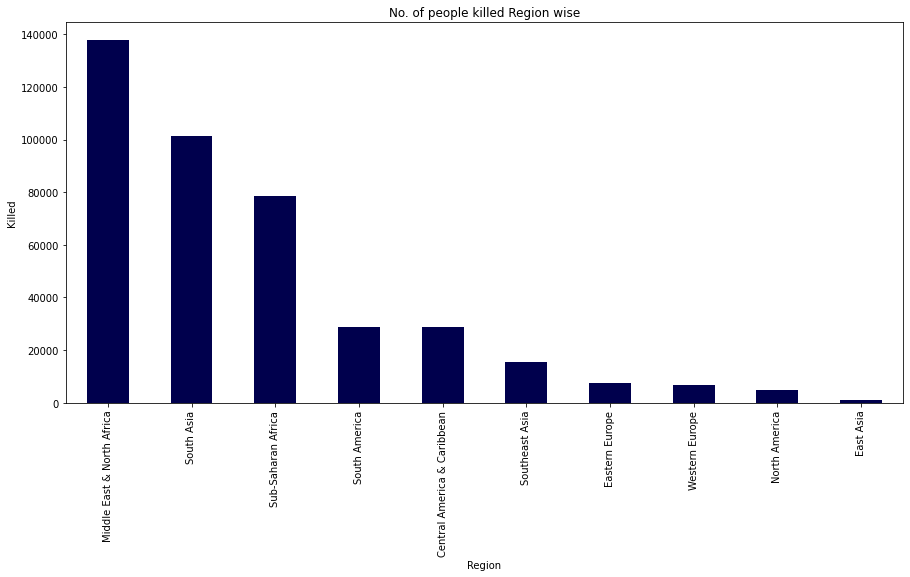

In [65]:
plt.figure(figsize = (15,7))
terror_df.groupby(['region'])['killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'seismic')
plt.xticks(rotation=90)
plt.title('No. of people killed Region wise')
plt.xlabel("Region")
plt.ylabel("Killed")
plt.show()

Insight
Top 5 Regions which lost their population due Terrorist attacks
(Region -- No. of Killed)

Middle East & North Africa -- 137642
South Asia -- 101319
Sub-Saharan Africa -- 78386
South America -- 28849
Central America & Caribbean -- 28708
The no. of deaths are very high for first three regions as compared to the remaining ones

Region Vs Wounded

In [66]:
region_wounded = terror_df[['region','wounded']].groupby(["region"],axis=0).sum().sort_values('wounded', ascending = False)
region_wounded

,wounded
region,
Middle East & North Africa,214308
South Asia,141360
Sub-Saharan Africa,52856
Southeast Asia,26259
North America,21531
Western Europe,18332
South America,16704
Eastern Europe,12045
East Asia,9213


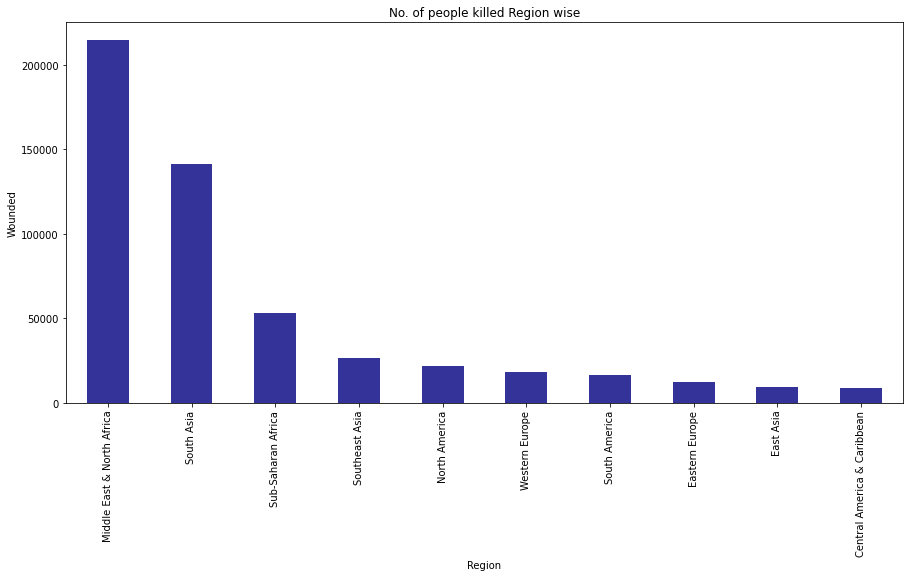

In [67]:
plt.figure(figsize = (15,7))
terror_df.groupby(['region'])['wounded'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'terrain')
plt.xticks(rotation=90)
plt.title('No. of people killed Region wise')
plt.xlabel("Region")
plt.ylabel("Wounded")
plt.show()

Insight
Top 5 Regions where people got injurd due Terrorist attacks
(Region -- No. of wounded)

Middle East & North Africa -- 214308
South Asia -- 141360
Sub-Saharan Africa -- 52856
Southeast Asia -- 26259
North America -- 21531